In [91]:
import pandas as pd

train_data = pd.read_csv('train.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)
test_set.shape

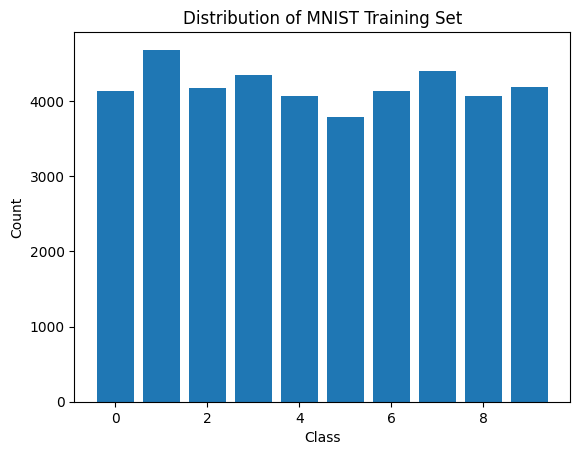

In [93]:
import matplotlib.pyplot as plt
class_counts = train_data["label"].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.xlabel("Number")
plt.ylabel("Count")
plt.title("Distribution of Label target class")

plt.show()

The data set is a collection of handwritten numbers. The models should be able to predict the handwritten numbers into the actual numerical digit.

In [95]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

X_train = train_set.drop('label', axis=1).values.astype(np.float32)
y_train = keras.utils.to_categorical(train_set['label'].values, 10)

X_test = test_set.drop('label', axis=1).values.astype(np.float32)
y_test = keras.utils.to_categorical(test_set['label'].values, 10)

X_train /= 255.0
X_test /= 255.0

seq_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = seq_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

test_loss, test_acc = seq_model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
237/237 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.8748 - val_loss: 0.2234 - val_accuracy: 0.9426
Epoch 2/10
237/237 [==============================] - 1s 3ms/step - loss: 0.2037 - accuracy: 0.9407 - val_loss: 0.1625 - val_accuracy: 0.9577
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.9562 - val_loss: 0.1286 - val_accuracy: 0.9670
Epoch 4/10
237/237 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9654 - val_loss: 0.1207 - val_accuracy: 0.9649
Epoch 5/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0985 - accuracy: 0.9716 - val_loss: 0.1020 - val_accuracy: 0.9699
Epoch 6/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9764 - val_loss: 0.0917 - val_accuracy: 0.9753
Epoch 7/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9793 - val_loss: 0.0892 - val_accuracy: 0.9759
Epoch 

In [96]:
import numpy as np
from tensorflow import keras
X_train = train_set.drop('label', axis=1).values.astype(np.float32).reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(train_set['label'].values, 10)

X_test = test_set.drop('label', axis=1).values.astype(np.float32).reshape(-1, 28, 28, 1)
y_test = keras.utils.to_categorical(test_set['label'].values, 10)

X_train /= 255.0
X_test /= 255.0

cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
237/237 [==============================] - 6s 22ms/step - loss: 0.3822 - accuracy: 0.8930 - val_loss: 0.1572 - val_accuracy: 0.9571
Epoch 2/10
237/237 [==============================] - 6s 27ms/step - loss: 0.1225 - accuracy: 0.9651 - val_loss: 0.0956 - val_accuracy: 0.9738
Epoch 3/10
237/237 [==============================] - 6s 24ms/step - loss: 0.0796 - accuracy: 0.9760 - val_loss: 0.0850 - val_accuracy: 0.9783
Epoch 4/10
237/237 [==============================] - 5s 20ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0739 - val_accuracy: 0.9801
Epoch 5/10
237/237 [==============================] - 5s 23ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.0643 - val_accuracy: 0.9815
Epoch 6/10
237/237 [==============================] - 5s 21ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0691 - val_accuracy: 0.9807
Epoch 7/10
237/237 [==============================] - 5s 22ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0663 - val_accuracy: 0.9818

In [82]:
import ssl
import urllib.request

context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)


In [92]:
import urllib.request
import ssl
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = 'cats_and_dogs_filtered.zip'
if not os.path.exists(filename):
    context = ssl._create_unverified_context()
    response = urllib.request.urlopen(url, context=context)
    with open(filename, 'wb') as f:
        f.write(response.read())

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'cats_and_dogs_filtered/train'
val_dir = 'cats_and_dogs_filtered/validation'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [88]:
import urllib.request
import ssl
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

url = 'https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
filename = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen(url, context=context)
with open(filename, 'wb') as f:
    f.write(response.read())

vgg = VGG16(include_top=False, weights=filename, input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
        train_generator,
        steps_per_epoch=200,
        epochs=10,
        validation_data=val_generator,
        validation_steps=50)



Epoch 1/10


2023-04-22 17:15:37.368049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 24/200 [==>...........................] - ETA: 13:55 - loss: 0.4820 - accuracy: 0.7513

KeyboardInterrupt: 

Analysis:
By computing all the accuracy we notice that the CNN architecture is producing the best accuracy. However all the accuracies are really close to each other and it is about 95-98%. This proves that all the models are creating very good predictions.